In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab
from pylab import xticks



#%matplotlib inline

#plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (10, 6)

#sns.set(style="whitegrid") # seteando tipo de grid en seaborn


clicksDF = pd.read_csv('clicks.csv.gzip', compression='gzip', dtype={'advertiser_id':'int32','action_id':'float32','source_id':'int32','country_code':'category',\
                                                                           'latitude':'float32','longitude':'float32','carrier_id':'float32','os_minor':'category',\
                                                                           'os_major':'category','specs_brand':'category','timeToClick':'float32','touchX':'float32',\
                                                                           'touchY':'float32','ref_type':'category'}, index_col='trans_id')
clicksDF['created'] = pd.to_datetime(clicksDF['created'])
eventsDF = pd.read_csv('events.csv.gzip', compression='gzip',low_memory=False, dtype={'event_id':'int32','ref_type':'category','application_id':'int32',\
                                                                                            'attributed':'bool','device_countrycode':'category','device_city':'category',\
                                                                                            '7Y6<Y4VBtrans_id':'category','carrier':'category',\
                                                                                            'wifi':'bool','connection_type':'category'}, index_col='event_uuid')
# le quite a eventsDF 'device_os':'category',

eventsDF['date'] = pd.to_datetime(eventsDF['date'])

installsDF = pd.read_csv('installs.csv.gzip', compression='gzip',index_col='ref_hash', dtype={'ref_type':'category','application_id':'int32',\
                                                                                              'device_brand':'category','click_hash':'float32','wifi':'bool'\
                                                                                            })
installsDF['created'] = pd.to_datetime(installsDF['created'])
#dropear session_user_agent q nos dijo se puede desestimar
installsDF.drop(columns=['session_user_agent'])
    
auctionsDF = pd.read_csv('auctions.csv.gzip', compression='gzip', low_memory=False, dtype={'country':'category','platform':'category','ref_type_id':'category'})
#preguntar devide_id , es el cel o el server?

#ignoramos target competencia para el TP1
#target_competenciaDF = pd.read_csv('target_competencia.csv', index_col='index',dtype={'index':'int32','obj_Sc':'int32','obj_St':'int32'})

print('setup done')



setup done


In [5]:
eventsDF.head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
event_uuid,,,,,,,,,,,,,,,,,,,,,
a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1cd98205-0d97-4ec2-a019-667997dbfe7a,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
f02e2924-21ae-492b-b625-9021ae0a4eca,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
a813cf45-a36e-4668-85e2-5395f1564e98,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.731902e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [19]:
eventsDF.shape

(2494423, 21)

In [2]:
#eventsDF['ip_address'].value_counts()

In [19]:
## naming the OS of the devices
#group by category
#device_name=pd.Series([eventsDF[device_os].value_counts])
tempDF=eventsDF['device_os'].value_counts()
#tempDF['os_name']=
#eventsDF['os_name']=eventsDF['device_os'].replace({ 7.531669329342818e+18:'os_1' , 6.941824626260379e+18:'os_2', 2.7488313570525307e+18:'os_3' , 5.916186881232351e+18: 'os_4'})


In [18]:
tempDF.head()


7.531669329342818e+18     389811
6.941824626260379e+18     260861
2.7488313570525307e+18      6110
5.916186881232351e+18        885
Name: device_os, dtype: int64

In [61]:
eventsDF.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
event_uuid,,,,,,,,,,,,,,,,,,,,,
a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.53167e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1cd98205-0d97-4ec2-a019-667997dbfe7a,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.53167e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
f02e2924-21ae-492b-b625-9021ae0a4eca,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.53167e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
a813cf45-a36e-4668-85e2-5395f1564e98,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.561153e+18,7.53167e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.731902e+17,7.53167e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [9]:
clicksDF.head(5)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
trans_id,,,,,,,,,,,,,,,,,,,
iGgClCM9exiHF4K31g94XmvHEBSLKIY,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563000,0.905,0.078,1891515180541284343,1904083516767779093
MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013000,0.035,0.431,1891515180541284343,4368617728156436525
X5XTOcYQovkl6yadYdAD7xioVGU9jiY,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.110001,0.054,0.423,1891515180541284343,4368617728156436525


In [11]:
clicksDF.shape

(26351, 19)

In [10]:
installsDF.head(5)

,created,application_id,ref_type,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
ref_hash,,,,,,,,,,,,,,,,,
8464844987297247076,2019-03-13 01:43:33.445,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
3250564871270161533,2019-03-13 04:58:35.078,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
7953318831018100268,2019-03-13 04:20:57.666,0,1891515180541284343,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
7953318831018100268,2019-03-13 04:20:57.698,0,1891515180541284343,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
8355110941557237501,2019-03-10 22:24:56.684,0,1891515180541284343,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [12]:
installsDF.shape

(3412, 17)

In [89]:
auctionsDF.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [98]:
auctionsDF['country'].value_counts()
#ignoramos country como variable por ser un único país

6333597102633388268    19571319
Name: country, dtype: int64

## Let's try some joins

### Interseccion de los grupos de usarios clicks con eventos, clicks con installs

In [4]:
clicks_installsDF = pd.merge(installsDF, clicksDF, on='ref_hash', how='inner')
clicks_installsDF.head()


,ref_hash,created_x,application_id,ref_type_x,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,...,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type_y
0,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,False,2970470518450881158,NaN,1.990627e+18,...,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,NaN,NaN,1494519392962156891
1,582930240149217282,2019-03-06 21:33:40.647,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,...,13.0,6.391567095202501e+18,6.882415e+18,7.452405704979208e+18,2733035977666442898,NaN,2.253,0.900,0.097,1891515180541284343
2,582930240149217282,2019-03-06 21:33:40.647,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,...,13.0,6.391567095202501e+18,6.882415e+18,7.452405704979208e+18,2733035977666442898,NaN,3.493,0.904,0.097,1891515180541284343
3,582930240149217282,2019-03-06 21:33:40.647,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,...,13.0,6.391567095202501e+18,6.882415e+18,7.452405704979208e+18,2733035977666442898,NaN,1.849,0.821,0.097,1891515180541284343
4,582930240149217282,2019-03-06 21:33:40.647,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,...,13.0,6.391567095202501e+18,6.882415e+18,7.452405704979208e+18,2733035977666442898,NaN,1.513,0.909,0.096,1891515180541284343


In [224]:
#ins_cli_x_userDF = clicks_installsDF.groupby(['ref_hash', 'ref_type_x',]).size().reset_index().rename(columns={0:'total'})
#Installs, events y clicks por usario
installs_x_userDF = installsDF.groupby(['ref_hash']).size().reset_index().rename(columns={0:'total'})
clicks_x_userDF = clicksDF.groupby(['ref_hash']).size().reset_index().rename(columns={0:'total'})
#al haber eventos atribuidos de Jampp, nos interesa tomar esos y no el total para este caso
events_x_userDF = eventsDF.loc[eventsDF['attributed']==True].groupby(['ref_hash']).size().reset_index().rename(columns={0:'total'})


(709, 2)

### Proporción e intersección entre clicks e installs segun User

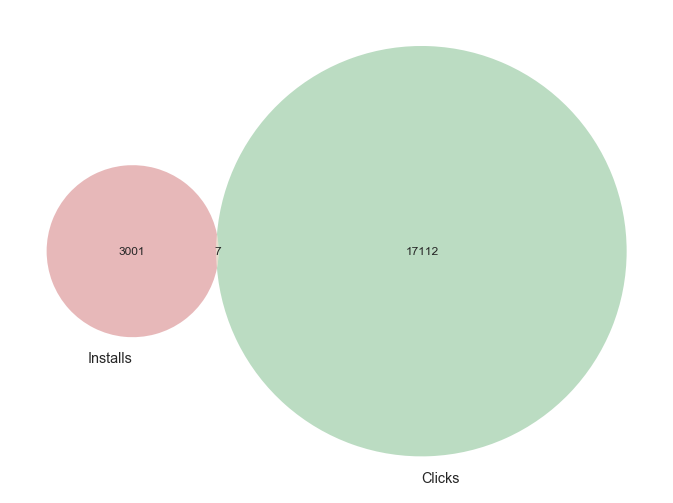

In [374]:
#plot del total de users venn (clicks, installs)
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
from matplotlib_venn import venn2

venn2([set(installs_x_userDF['ref_hash']), set(clicks_x_userDF['ref_hash'])], set_labels=('Installs', 'Clicks'))
plt.show()

###           Intersection between Installs and Clicks for the same user

### Proporción entre clicks Y events segun User

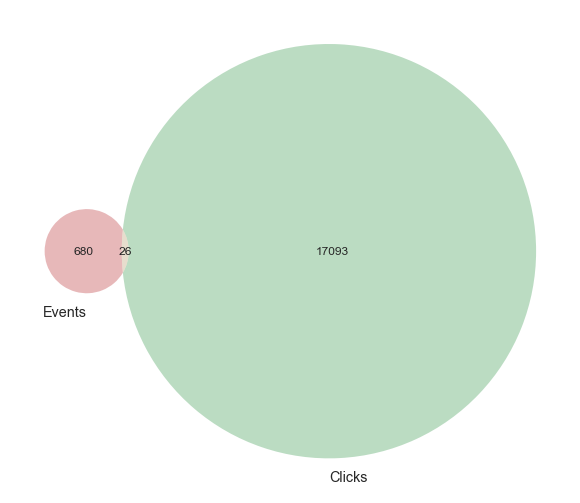

In [377]:
#plot del total de users venn (clicks, events)
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
from matplotlib_venn import venn2

venn2([set(events_x_userDF['ref_hash']), set (clicks_x_userDF['ref_hash'])], set_labels=('Events', 'Clicks'))
plt.show()

###           Intersection between Events and Clicks by user

[None]

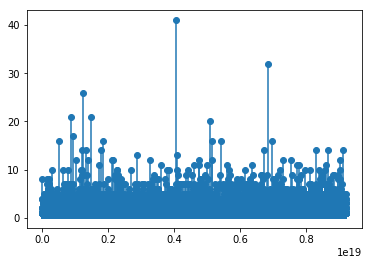

In [78]:
#lollipop plot del histograma de clicks x user - no nos interesa tanto
(markerline, stemlines, baseline) = plt.stem(clicks_x_userDF['ref_hash'], clicks_x_userDF['total'])
plt.setp(baseline, visible=False)

<BarContainer object of 709 artists>

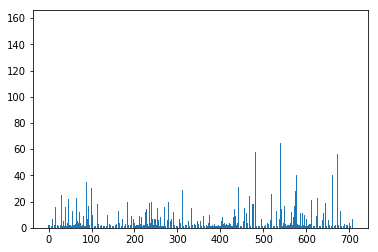

In [66]:
#plot del histograma de installs x user
height = (events_x_userDF['total'])
bars = (events_x_userDF['ref_hash'])
y_pos = np.arange(len(bars))
plt.bar(y_pos,height)

In [227]:
#events per user solo de jampp
events_x_userDF = eventsDF.loc[eventsDF['attributed']==True].groupby(['ref_hash']).size().reset_index().rename(columns={0:'total'})
#events_x_userDF.shape

## Eventos x User


[None]

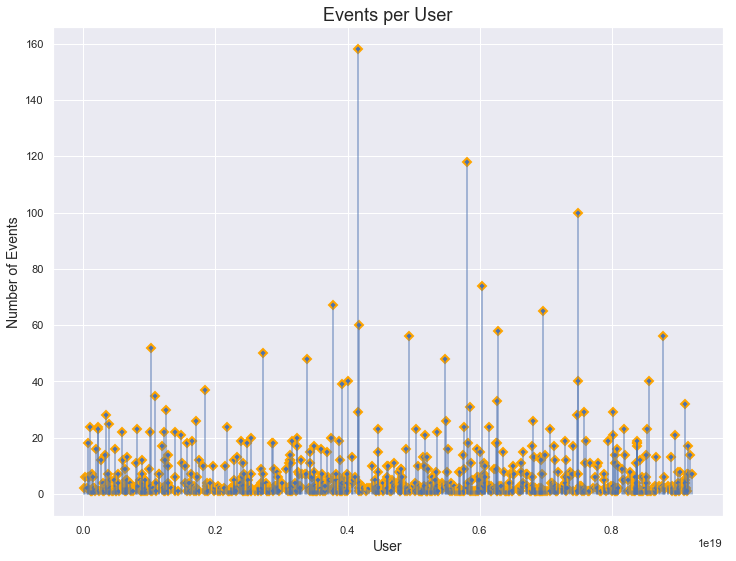

<Figure size 1600x880 with 0 Axes>

In [229]:
#Visualización lollipop de eventos por usuario
plt.title('Events per User', fontsize=18)
plt.xlabel('User', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
(markerline, stemlines, baseline) = plt.stem(events_x_userDF['ref_hash'], events_x_userDF['total'])
figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
# change color and shape and size and edges
plt.setp(markerline, marker='D', markersize=5, markeredgecolor="orange", markeredgewidth=2)
plt.setp(stemlines, alpha=0.6 )
plt.setp(baseline, visible=False)
#plt.show()

In [123]:
# get the top value
events_x_userDF.loc[events_x_userDF['total'].idxmax()]

ref_hash    4153352203585747855
total                       158
Name: 311, dtype: int64

In [ ]:
#get also the next two rows with the biggest deviation 
top_3_usersDF=events_x_userDF.loc[events_x_userDF['total']>90]
top_3_usersDFevents_x_userDF.loc[events_x_userDF['total'].idxmax()]

### (investigando uno de los outliers)

In [395]:
#investigando al User con device ID 4153352203585747855 que cuenta con 158 eventos
user1DF=eventsDF.loc[eventsDF['ref_hash']==4153352203585747855]
user1DF.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
event_uuid,,,,,,,,,,,,,,,,,,,,,
NaN,2019-03-13 17:29:15.095,40,1891515180541284343,4153352203585747855,45,True,6333597102633388268,8.824599e+18,NaN,2.675149e+18,...,NaN,NaN,NaN,2.2481569642543155e+17,NaN,7.531669e+18,NaN,Cable/DSL,9027356762104797654,3.301378e+18
NaN,2019-03-13 17:29:19.356,41,1891515180541284343,4153352203585747855,45,True,6333597102633388268,8.824599e+18,NaN,2.675149e+18,...,NaN,NaN,NaN,2.2481569642543155e+17,NaN,7.531669e+18,NaN,Cable/DSL,9027356762104797654,3.301378e+18
NaN,2019-03-13 17:29:14.413,1,1891515180541284343,4153352203585747855,45,True,6333597102633388268,8.824599e+18,NaN,2.675149e+18,...,NaN,NaN,NaN,2.2481569642543155e+17,NaN,7.531669e+18,NaN,Cable/DSL,9027356762104797654,3.301378e+18
NaN,2019-03-12 20:22:08.739,40,1891515180541284343,4153352203585747855,45,True,6333597102633388268,8.824599e+18,NaN,2.675149e+18,...,NaN,NaN,NaN,2.2481569642543155e+17,NaN,7.531669e+18,NaN,Cellular,1425482436003722411,3.301378e+18
NaN,2019-03-12 20:22:23.439,41,1891515180541284343,4153352203585747855,45,True,6333597102633388268,8.824599e+18,NaN,2.675149e+18,...,NaN,NaN,NaN,2.2481569642543155e+17,NaN,7.531669e+18,NaN,Cellular,1425482436003722411,3.301378e+18


In [398]:
user1_dayDF = user1DF.loc[user1DF['attributed']==True].groupby(['event_id','application_id','attributed','ip_address','date']).size().reset_index().rename(columns={0:'total'})
user1_dayDF.head()

,event_id,application_id,attributed,ip_address,date,total
0,1,45,True,28589935755076800,2019-03-06 21:03:44.609,1
1,1,45,True,1351065840000589205,2019-03-13 21:25:58.767,1
2,1,45,True,1529935197789281008,2019-03-11 20:31:28.832,1
3,1,45,True,1529935197789281008,2019-03-11 21:38:28.690,1
4,1,45,True,1529935197789281008,2019-03-12 02:47:43.244,1


Text(0, 0.5, 'Frequency')

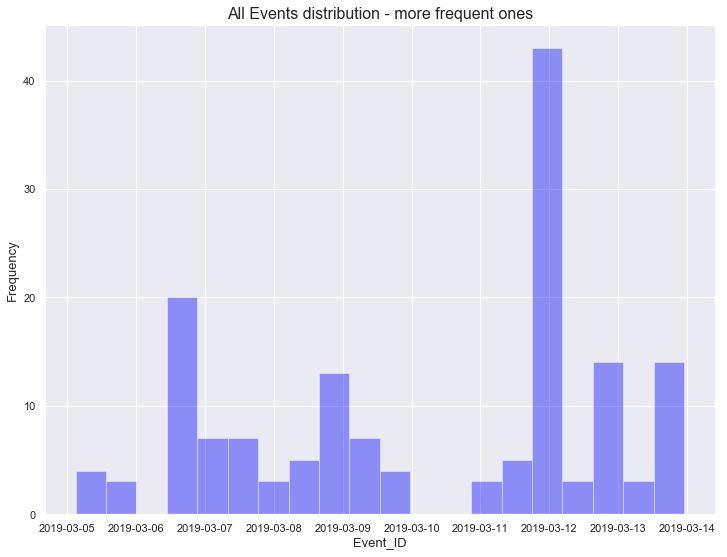

In [399]:
#visualizamos en el tiempo
# Distribucion/cantidad de eventos 
sns.set(rc={'figure.figsize':(12,9)})
#primero para el DF de eventos total
sns.distplot(user1_dayDF['date'], bins=20, color='blue', kde=False)
#ahora para el DF de eventos atribuidos a jampp
#sns.distplot( events_jamppDF['event_id'], bins=100, color='blue', label='Eventos de Jampp')
#plt.legend(prop={'size': 12})
plt.title('All Events distribution - more frequent ones', fontsize=16)
plt.xlabel('Event_ID', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
#sns.plt.show()


In [230]:
# Excluyendo esos 3 valores, volvemos a analizar la distribución
events_withoutDF=eventsDF.loc[~eventsDF['ref_hash'].isin([4153352203585747855,5811896797087419802,7486989802522901338])]

In [232]:
# Recalculamos el DF sin esos valores
events_x_userDF = events_withoutDF.loc[events_withoutDF['attributed']==True].groupby(['ref_hash']).size().reset_index().rename(columns={0:'total'})
events_x_userDF.shape

(706, 2)

[None]

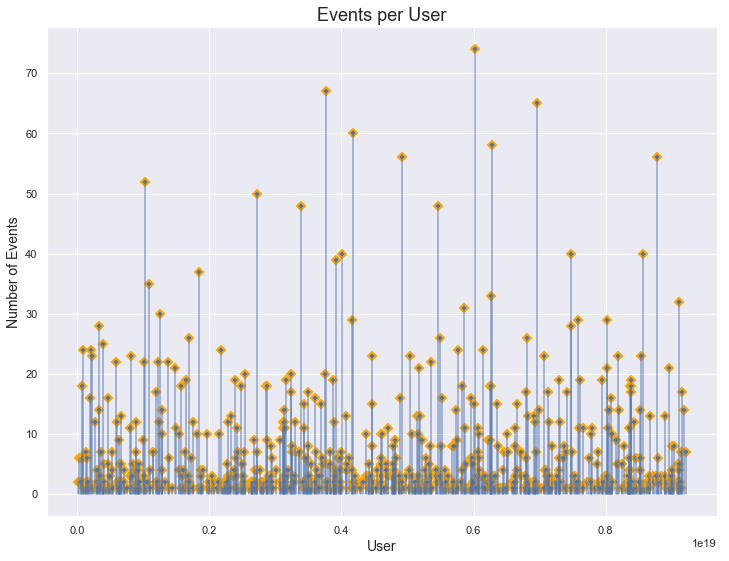

<Figure size 1600x880 with 0 Axes>

In [234]:
#lollipop plot de events x user (Jampp)
plt.title('Events per User', fontsize=18)
plt.xlabel('User', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
(markerline, stemlines, baseline) = plt.stem(events_x_userDF['ref_hash'], events_x_userDF['total'])
figure(num=None, figsize=(20, 11), dpi=80, facecolor='w', edgecolor='k')
# change color and shape and size and edges
plt.setp(markerline, marker='D', markersize=5, markeredgecolor="orange", markeredgewidth=2)
plt.setp(stemlines, alpha=0.6)
plt.setp(baseline, visible=False)

#plt.show()


In [270]:
#Datos estadísticos de la distribución
events_x_userDF.describe()

,ref_hash,total
count,7.060000e+02,706.000000
mean,4.664898e+18,6.689802
std,2.653634e+18,9.560191
min,3.734549e+15,1.000000
25%,2.492897e+18,1.000000
50%,4.783660e+18,3.000000
75%,6.906046e+18,8.000000
max,9.220804e+18,74.000000


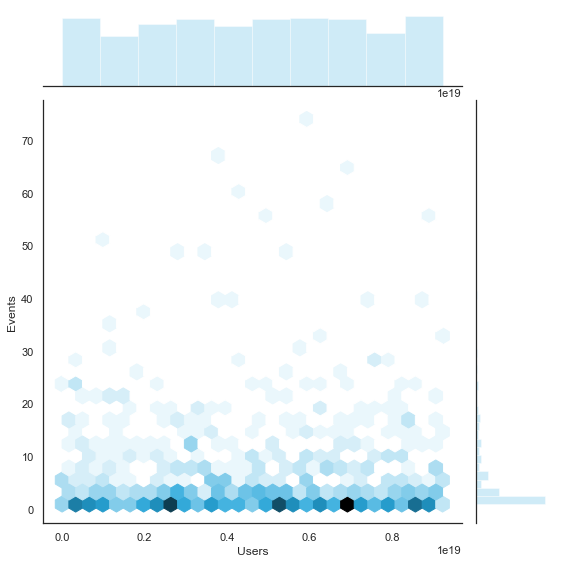

In [274]:
#Cual es la correlación entre users and events?
#SCATTER plot

#DENSITY HEXBIN CHART
sns.jointplot(x=events_x_userDF['ref_hash'], y=events_x_userDF['total'], kind='hex', height=8, color="skyblue").set_axis_labels('Users','Events')


### Correlation between Events and Users

### Eventos x aplicaciones

In [299]:
events_appDF= eventsDF.loc[eventsDF['attributed']==True].groupby(['application_id']).size().reset_index().rename(columns={0:'total'})

[None]

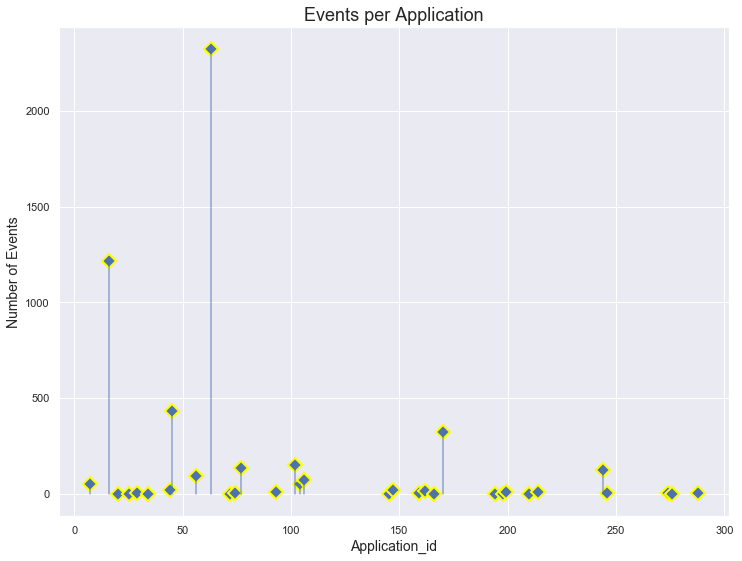

<Figure size 1200x880 with 0 Axes>

In [297]:
#lollipop plot de events x app (Jampp)
plt.title('Events per Application', fontsize=18)
plt.xlabel('Application_id', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
(markerline, stemlines, baseline) = plt.stem(events_appDF['application_id'], events_appDF['total'])
figure(num=None, figsize=(15, 11), dpi=80, facecolor='w', edgecolor='k')
# change color and shape and size and edges
plt.setp(markerline, marker='D', markersize=10, markeredgecolor="yellow", markeredgewidth=2)
plt.setp(stemlines, alpha=0.6)
plt.setp(baseline, visible=False)

In [296]:
#se observan 2 valores que se alejan mucho de la media

events_appDF.describe()
#events_appDF.loc[events_appDF['total'].idxmax()]


,application_id,total
count,33.000000,33.000000
mean,129.060606,154.515152
std,85.443307,449.360179
min,7.000000,1.000000
25%,56.000000,2.000000
50%,106.000000,8.000000
75%,198.000000,75.000000
max,288.000000,2323.000000


In [401]:
events_appDF['total'].value_counts()


1       5
2       5
3       3
125     1
15      1
1219    1
4       1
5       1
135     1
8       1
10      1
75      1
2323    1
53      1
20      1
150     1
91      1
11      1
19      1
431     1
51      1
323     1
7       1
Name: total, dtype: int64

In [403]:
events_appDF['application_id'].value_counts()

63     1
214    1
194    1
274    1
198    1
7      1
72     1
199    1
74     1
166    1
77     1
16     1
145    1
210    1
147    1
20     1
276    1
56     1
25     1
29     1
159    1
288    1
34     1
102    1
162    1
104    1
106    1
44     1
45     1
170    1
244    1
246    1
93     1
Name: application_id, dtype: int64

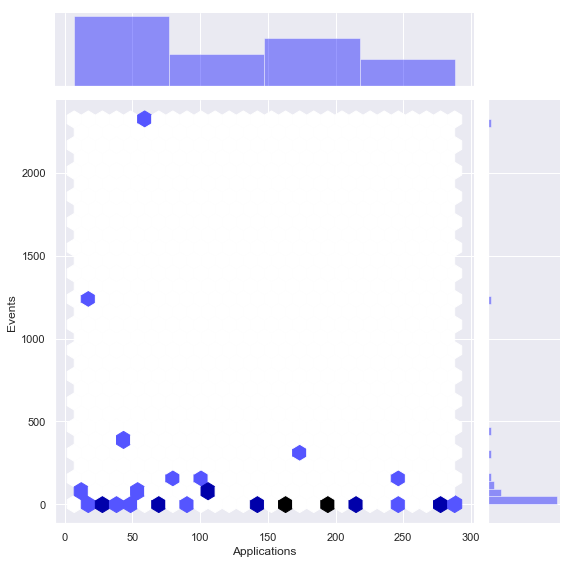

In [392]:
#DENSITY CHART
sns.jointplot(x=events_appDF['application_id'], y=events_appDF['total'], kind='hex', height=8, color='blue')\
.set_axis_labels('Applications','Events')

### Events per Application

### Events per Client

In [350]:
#Para poder observar si hay alguna conducta o relación interesante entre los clientes y las aplicaciones, hacemos un merge de ambos DFs: Clicks y Events
clicks_eventsDF = pd.merge(eventsDF, clicksDF, on='ref_hash', how='inner')
clicks_eventsDF.shape

(23655, 39)

Text(0, 0.5, 'Frequency')

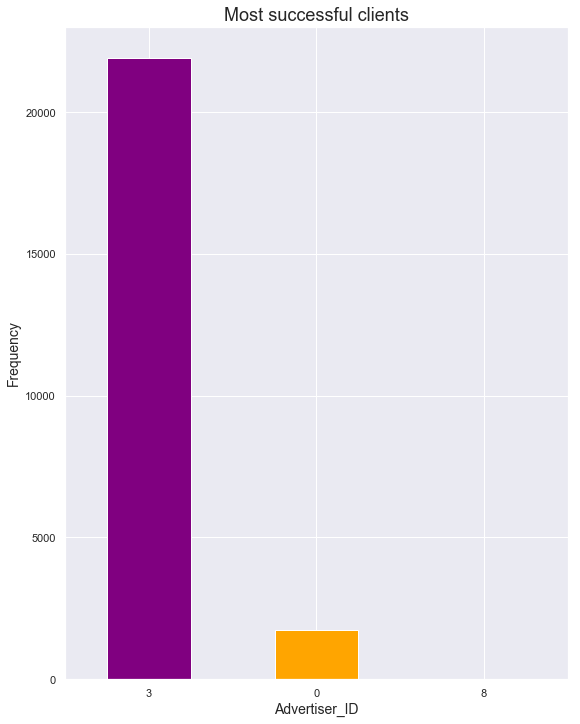

In [366]:
#HAcemos la visualiación para identificar los clientes con más exito de conversiones
clicks_eventsDF['advertiser_id'].value_counts().sort_values(ascending = False).plot(kind = 'bar', grid = True, figsize = (9,12), color=['purple', 'orange'])
plt.xticks(rotation = 0)
plt.title('Most successful clients', fontsize=18)
plt.xlabel('Advertiser_ID', fontsize=14)
#plt.yticks(yticks)
plt.ylabel('Frequency', fontsize=14)

In [361]:
clicks_eventsDF['advertiser_id'].value_counts().sort_values(ascending = False)

3    21923
0     1727
8        5
Name: advertiser_id, dtype: int64

In [329]:
# DF de relación events and clicks para clientes de Jampp
events_x_clientjDF = clicks_eventsDF.loc[clicks_eventsDF['attributed']==True].groupby(['advertiser_id','application_id']).size().reset_index().rename(columns={0:'total'})

(709, 2)

## Relación entre los clientes de Jampp, las aplicaciones en las q se mostró su publicidad y la cantidad de eventos generados

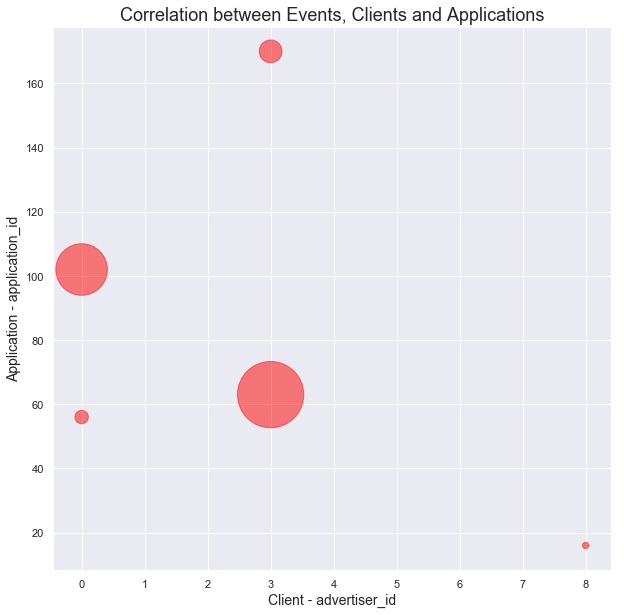

In [339]:
#Bubble pot para observar la relación entre events, clients and applications
x = events_x_clientjDF['advertiser_id']
y = events_x_clientjDF['application_id']
z = events_x_clientjDF['total']
plt.figure(figsize = (10,10))
# use the scatter function
plt.scatter(x, y, s=z*20, c="red", alpha=0.5)
# Add titles (main and on axis)
plt.xlabel('Client - advertiser_id', fontsize=14)
plt.ylabel('Application - application_id', fontsize=14)
plt.title('Correlation between Events, Clients and Applications', fontsize=18)
plt.show()

In [342]:
events_x_clientjDF.loc[events_x_clientjDF['total'].idxmax()]

advertiser_id       3
application_id     63
total             220
Name: 2, dtype: int64

In [351]:
#Eventos para el cliente 0 y las dos aplicaciones donde se mostró su publicidad
events_x_clientjDF.loc[events_x_clientjDF['advertiser_id']==0]

,advertiser_id,application_id,total
0,0,56,9
1,0,102,133


In [352]:
#Eventos para el cliente 3 y las dos aplicaciones donde se mostró su publicidad
events_x_clientjDF.loc[events_x_clientjDF['advertiser_id']==3]

,advertiser_id,application_id,total
2,3,63,220
3,3,170,26


### Relación entre los clientes, las aplicaciones en las q se mostró su publicidad y la cantidad de instalaciones

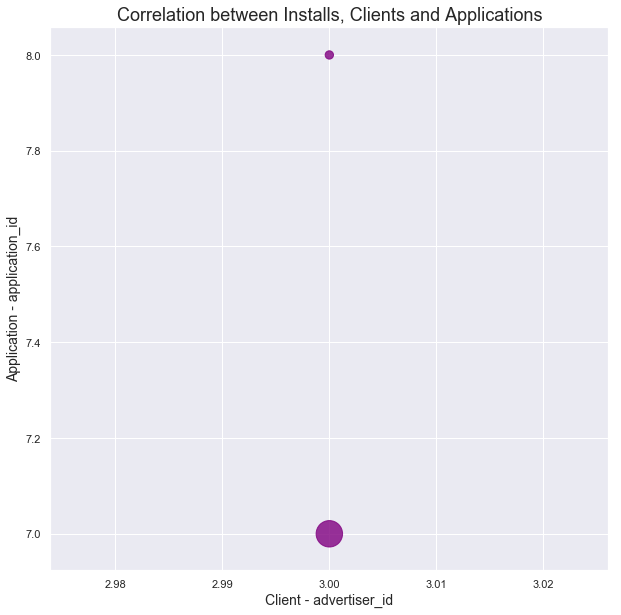

In [385]:
# DF de relación installs and clicks para clientes 
installs_x_clientDF = clicks_installsDF.groupby(['advertiser_id','application_id']).size().reset_index().rename(columns={0:'total'})
#Bubble pot para observar la relación entre installs, clients and applications. Al no haber atribuidas a jampp, se toma la muestra total
x = installs_x_clientDF['advertiser_id']
y = installs_x_clientDF['application_id']
z = installs_x_clientDF['total']
plt.figure(figsize = (10,10))
# use the scatter function
plt.scatter(x, y, s=z*70, c='purple', alpha=0.8)
# Add titles (main and on axis)
plt.xlabel('Client - advertiser_id', fontsize=14)
plt.ylabel('Application - application_id', fontsize=14)
plt.title('Correlation between Installs, Clients and Applications', fontsize=18)
plt.show()

### Users q observan comportamiento en los 3 grupos: clicks, installs y events


In [86]:
#estos users estan en la intersección de todos los grupos y puede que tengan mas chances de convertir
inner_users_allDF = pd.merge(installsDF, eventsDF, on= 'ref_hash', how= 'inner')
inner_users_allDF = pd.merge(inner_users_allDF, clicksDF, on= 'ref_hash', how= 'inner')


In [87]:
#dejando sólo las columnas relevantes
#para identificar si es install or event, ser deja click_hash en installs y event_uuid para eventos
inner_users_allDF = inner_users_allDF.drop(['device_countrycode_x','touchX', 'touchY', 'device_language_x', 'session_user_agent_y', 'action_id', 'latitude', 'longitude', 'country_code',\
                  'implicit', 'session_user_agent_x', 'kind_x', 'wifi_x', 'trans_id_x', 'ip_address_x', 'device_countrycode_y', 'device_city', 'kind_y', 'wifi_y', \
                 'connection_type', 'ip_address_y', 'device_language_y', 'wifi_connection' ], axis=1)


In [82]:
installsDF['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [88]:
#check_later day of the week label
#all_usersDF['day_of_week'] = all_usersDF['created_x'].dt.day_name()
#all_usersDF['day_of_week'] = all_usersDF['created_y'].dt.day_name()
inner_users_allDF.head()

,ref_hash,created_x,application_id_x,ref_type_x,click_hash,attributed_x,device_brand_x,device_model_x,user_agent_x,event_uuid,...,source_id,created_y,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,ref_type
0,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,NaN,1.990627e+18,NaN,NaN,...,0,2019-03-11 13:59:56.718,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,1494519392962156891
1,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,NaN,1.990627e+18,NaN,NaN,...,0,2019-03-11 13:59:56.718,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,1494519392962156891
2,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,NaN,1.990627e+18,NaN,NaN,...,0,2019-03-11 13:59:56.718,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,1494519392962156891
3,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,NaN,1.990627e+18,NaN,NaN,...,0,2019-03-11 13:59:56.718,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,1494519392962156891
4,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,NaN,1.990627e+18,NaN,NaN,...,0,2019-03-11 13:59:56.718,3.0,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,2733035977666442898,NaN,NaN,1494519392962156891


### Events x User x app

In [30]:
#merge con clicks para sacar el app_id
#user_appDF = pd.merge(eventsDF, clicksDF, on= 'ref_hash', how= 'inner') - no need
#events_jamppDF = eventsDF.apply(lambda x:1 if eventsDF['attributed'] == 'true' else np.NaN)
#events_jamppDF.head()
events_user_appDF = eventsDF.groupby(['ref_hash', 'application_id']).size().reset_index().rename(columns={0:'total'})
events_user_appDF.shape

#installs_x_userDF['day_of_week'] = all_usersDF['created_x'].dt.day_name()

(219725, 3)

In [ ]:
# Users with events attributed to Jampp grouped by application and client
users_client_appDF = events_user_app_DF

In [62]:
#events x user and app attributed to jampp
events_user_jamppDF = eventsDF.loc[eventsDF['attributed']==True].groupby(['ref_hash', 'application_id']).size().reset_index().rename(columns = \
                                                                                                                                     {0:'total'})
#events_user_jamppDF = events_user_jampp.loc[events_user_jampp['total']>1]
events_user_jamppDF.head()

,ref_hash,application_id,total
0,3734548868538049,16,2
1,27908941588426094,170,6
2,52110095334412606,34,2
3,63706564589198060,104,6
4,67726569533000506,16,18


In [44]:
import matplotlib.pyplot as plt
from scipy.stats import kde

## Intersección entre eventos y app

In [304]:
# primero cant de eventos
event_top=eventsDF['event_id'].value_counts().max()
event_mean=eventsDF['event_id'].value_counts().mean()
event_median=eventsDF['event_id'].value_counts().std()
print(event_top)
print(event_mean)
print(event_median)

618228
4391.5897887323945
34044.657219677196


In [177]:
#eventos solamente de Jampp
events_jamppDF=events_withoutDF.loc[events_withoutDF['attributed']==True]
#Ahora again solo para los de Jampp
event_top=events_jamppDF['event_id'].value_counts().max()
event_mean=events_jamppDF['event_id'].value_counts().mean()
event_median=events_jamppDF['event_id'].value_counts().median()
print(event_top)
print(event_mean)
print(event_median)


1514
80.05084745762711
6.0


In [202]:
#ax = events_withoutDF['event_id'].plot.hist(bins=50, alpha=0.5, color='orange')

### Distribución de Eventos (con mayor frecuencia)

Text(0, 0.5, 'Frequency')

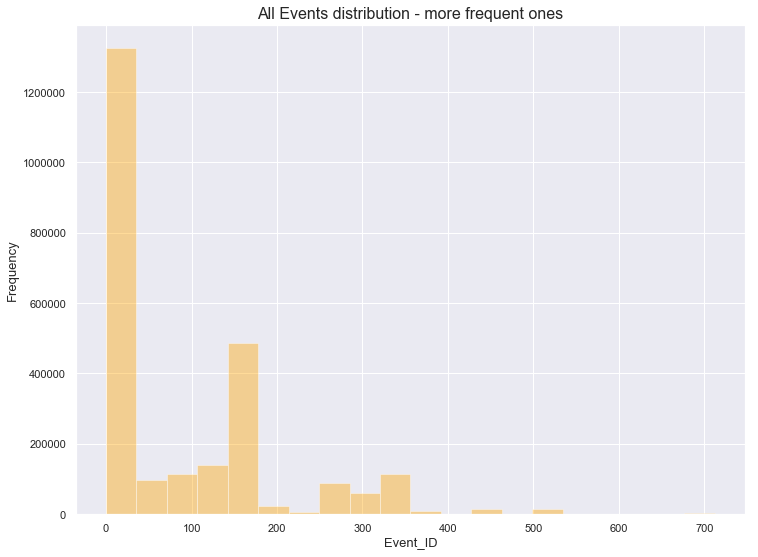

In [205]:
# Distribucion/cantidad de eventos 
sns.set(rc={'figure.figsize':(12,9)})
#primero para el DF de eventos total
sns.distplot(events_withoutDF['event_id'], bins=20, color='orange', kde=False)
#ahora para el DF de eventos atribuidos a jampp
#sns.distplot( events_jamppDF['event_id'], bins=100, color='blue', label='Eventos de Jampp')
#plt.legend(prop={'size': 12})
plt.title('All Events distribution - more frequent ones', fontsize=16)
plt.xlabel('Event_ID', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
#sns.plt.show()


Text(0, 0.5, 'Frequency')

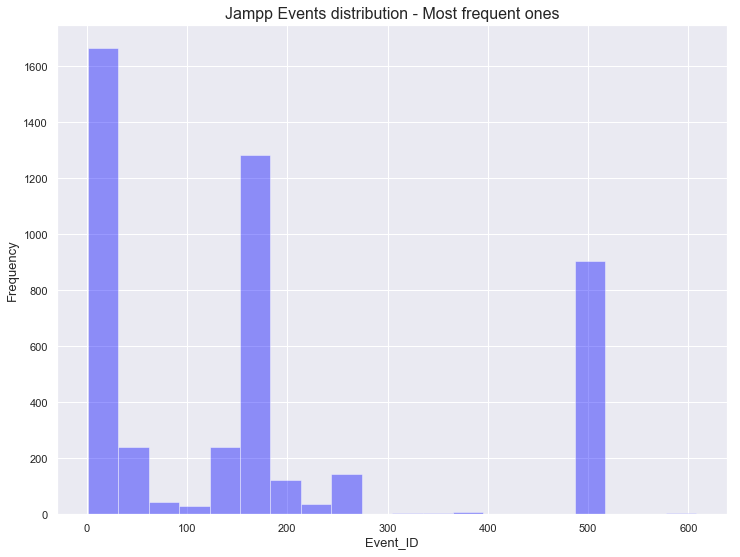

In [391]:
# Distribucion/cantidad de eventos 
sns.set(rc={'figure.figsize':(12,9)})
#primero para el DF de eventos total
#ahora para el DF de eventos atribuidos a jampp
sns.distplot( events_jamppDF['event_id'], bins=20, color='blue', kde=False)
#plt.legend(prop={'size': 12})
plt.title('Jampp Events distribution - Most frequent ones', fontsize=16)
plt.xlabel('Event_ID', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
#sns.plt.show()

In [15]:
auctionsDF['device_id'].isin(clicksDF['ref_hash']).value_counts()

False    14268927
True      5302392
Name: device_id, dtype: int64

In [19]:
auctionsDF['device_id'].isin(eventsDF['ref_hash']).value_counts()

False    13838204
True      5733115
Name: device_id, dtype: int64

In [ ]:
AuEvDF=pd.merge(auctionsDF, eventsDF, left_on='device_id', right_on='ref_hash', how='inner')

In [23]:
#client_counts['advertiser_id'].value_counts()
clicksDF['advertiser_id'].value_counts()
#Giving friendly name to the clients('advertiser_id')

#clicksDF['client']=clicksDF['advertiser_id'].replace(to_replace=0,value = 'client_1')
clicksDF['client']=clicksDF['advertiser_id'].replace({ 3:'client_1' , 0:'client_2', 2:'client_3' , 7: 'client_4' , 1: 'client_5' , 8: 'client_6', 5:'client_7'})

In [22]:
#g = sns.barplot(y=client.values, x=brand.values, palette=sns.color_palette("Set2", 3))
#g.set_title('Advertiser_id events segun brand', fontsize=18);
#g.set_xlabel('Brand');
#g.set_ylabel('Client');

In [ ]:
#No deshechamos esta parte ya que puede servir para futuro análisis on en caso de cambio del data set

### DF user profile for installs - Considering there are no installs attributed to Jampp, disregard this part

In [388]:
#Users that click and installs
users_installsDF=pd.merge(clicksDF, installsDF, on='ref_hash', how = 'inner')
#users_installsDF.head()

In [70]:
users_installsDF['day_of_week'] = users_installsDF['created_x'].dt.day_name()

In [46]:
users=users_installsDF.groupby('ref_hash').count()

In [389]:
#giving the users of interest a more friendly name
users_installsDF['user_id'] = users_installsDF['ref_hash'].replace([582930240149217282, 1254317779988816837, 2369915544093215150, 3685364020547088390,\
                         7190737170444985036, 7759178785240189555, 8187571300120427764], ['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6', 'user_7'])
#users_installsDF.head()

In [49]:
#Users that click and convert events
users_eventsDF=pd.merge(clicksDF, eventsDF, on='ref_hash', how = 'inner')
users_eventsDF.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,os_minor,...,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,os_name
0,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,...,NaN,NaN,NaN,5.104972e+18,NaN,NaN,NaN,4734439999480138563,6.111820e+18,NaN
1,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,...,NaN,NaN,NaN,5.104972e+18,NaN,NaN,NaN,4734439999480138563,6.111820e+18,NaN
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,...,NaN,NaN,NaN,5.104972e+18,NaN,NaN,NaN,4734439999480138563,6.111820e+18,NaN
3,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,...,NaN,NaN,NaN,5.104972e+18,NaN,NaN,NaN,3407912150780822286,6.111820e+18,NaN
4,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,...,NaN,NaN,NaN,2.376750e+18,NaN,NaN,NaN,4734439999480138563,6.111820e+18,NaN


In [41]:
users_eventsDF.shape

(23655, 41)

In [28]:
usersDF.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id_x,advertiser_id,action_id,source_id_y,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,client
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,3,NaN,0,...,NaN,3.072849339937028e+18,392184377613098015,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,client_1
1,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,3,NaN,0,...,NaN,3.072849339937028e+18,392184377613098015,NaN,14.084,0.264,0.830,1891515180541284343,6059599345986491085,client_1
2,NaN,6333597102633388268,2019-03-12 03:01:18.518467,6059599345986491085,1,1,0,3,NaN,0,...,NaN,3.072849339937028e+18,392184377613098015,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,client_1
3,NaN,6333597102633388268,2019-03-12 03:01:18.518467,6059599345986491085,1,1,0,3,NaN,0,...,NaN,3.072849339937028e+18,392184377613098015,NaN,14.084,0.264,0.830,1891515180541284343,6059599345986491085,client_1
4,NaN,6333597102633388268,2019-03-13 00:23:26.966605,6059599345986491085,1,1,0,3,NaN,0,...,NaN,3.072849339937028e+18,392184377613098015,NaN,7.050,0.229,0.945,1891515180541284343,6059599345986491085,client_1
